# Exercise 11


> In this exercise, we will have a look at penguins! We will attempt to figure out the species of penguins, based
> on their bill length, bill depth, flipper length, and body mass.
> The data is from a paper by 
> [Gorman, Williams, and Fraser](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)
> and can also be found in the R package [palmerpenguins](https://github.com/allisonhorst/palmerpenguins).
> Here, we will use a version of the data set [penguins.csv](./Data/penguins.csv) where missing
> values have been removed.
>
> The exercise is structured as follows:
> * [11.1 Initial exploration (of the data set)](#11.1-Initial-exploration)
> * [11.2 Creating a decision tree for determining the species](#11.2-Creating-a-decision-tree-for-determining-the-species)
> * [11.3 Exploring the penguins with partial least squares discriminant analysis (PLS-DA)](#11.3-Exploring-the-penguins-with-partial-least-squares-discriminant-analysis-(PLS-DA))
>
> In [11.3](#11.3-Exploring-the-penguins-with-partial-least-squares-discriminant-analysis-(PLS-DA))
> you will mostly run some code (to perform the analysis) and then interpret the results.

## 11.1 Initial exploration

The penguins belong to three species: [Adelie](https://en.wikipedia.org/wiki/Ad%C3%A9lie_penguin),
[Chinstrap](https://en.wikipedia.org/wiki/Chinstrap_penguin), and [Gentoo](https://en.wikipedia.org/wiki/Gentoo_penguin), and the figure below show the three islands where these penguins can be found (click the image to make it larger): 



| <a href="./Figures/penguins.png"><img src="./Figures/penguins2.png" width="50%"></a>           |
|:-:|
| **Fig. 1** *Location of islands and images of the penguin species.*    |

In the [penguins.csv](./Data/penguins.csv) data file you will find 7 columns. Each row is a measurement for
a single penguin for the 7 variables found in the columns:


| Column            |  Description                                                        |
|:------------------|--------------------------------------------------------------------:|
| species           | The species (Adelie/Chinstrap/Gentoo)                               |
| island            | The island where the observation was made (Dream/Torgersen/Biscoe)  |
| bill_length_mm    | (See the illustration below) (measured in mm)                       |
| bill_depth_mm     | (See the illustration below) (measured in mm)                       |
| flipper_length_mm | (See the illustration below) (measured in mm)                       |
| body_mass_g       | The weight of the penguin (in grams)                                |
| sex               | Female/Male                                                         |


| <img src="./Figures/bill.png" width="50%">                                   |
|:-:|
| **Fig. 2** *Illustration of bill length, bill depth, and flipper length. (The foot is not used in this data set.)*    |

### 11.1(a) Loading the data

First, load the data set on the penguins:

In [1]:
import pandas as pd

data = pd.read_csv("Data/penguins.csv")
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


After loading the data set, verify the following:

1. We have data from three distinct islands (Dream, Torgersen, and Biscoe).

1. We have data from three different penguin species (Adelie, Chinstrap, and Gentoo).

1. On the island Dream, the only species are Adelie and Chinstrap.

1. On the island Torgersen, the only specie is Adelie.

1. On the island of Biscoe, the only species are Adelie and Gentoo.

In [2]:
# 1. The islands:
print(data["island"].unique())

['Torgersen' 'Biscoe' 'Dream']


In [3]:
# 2. Penguin species:
print(data["species"].unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [4]:
# 3-5. Penguins on islands:
group = data.groupby(["island", "species"])
print(group.size())

island     species  
Biscoe     Adelie        44
           Gentoo       119
Dream      Adelie        55
           Chinstrap     68
Torgersen  Adelie        47
dtype: int64


#### Your answer to question 11.1(a):

> 1. We have data from three distinct islands (Dream, Torgersen, and Biscoe).

Yes, the code above list these 3 islands.

> 2. We have data from three different penguin species (Adelie, Chinstrap, and Gentoo).

Yes, the code above list these 3 species.

> 3. On the island Dream, the only species are Adelie and Chinstrap.

The code above says that there were 55 Adelie samples and 68 Chinstraps samples from Dream.

> 4. On the island Torgersen, the only specie is Adelie.

The code above says that there were 47 Adelie samples from Torgersen.

> 5. On the island of Biscoe, the only species are Adelie and Gentoo.

The code above says that there were 44 Adelie samples and 119 Gentoo samples from Biscoe.

### 11.1(b) Exploring by plotting

Investigate some plots to see if the variables `bill_length_mm`, `bill_depth_mm`,
`flipper_length_mm`, and `body_mass_g` can be used to separate the different
species. Below you will find 3 examples of plots you can create.

If you were to label a penguin as Adelie, Chinstrap, or Gentoo, what "rules" would you
use for this (keep it simple!) based on the 4 variables `bill_length_mm`, `bill_depth_mm`,
`flipper_length_mm`, and `body_mass_g`?

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib notebook
sns.set_theme(style="ticks", context="notebook", palette="muted")

#### Example plot 1

One way to get an overview is to use the scatter plot matrix, and color the
data points according to the species:

<IPython.core.display.Javascript object>


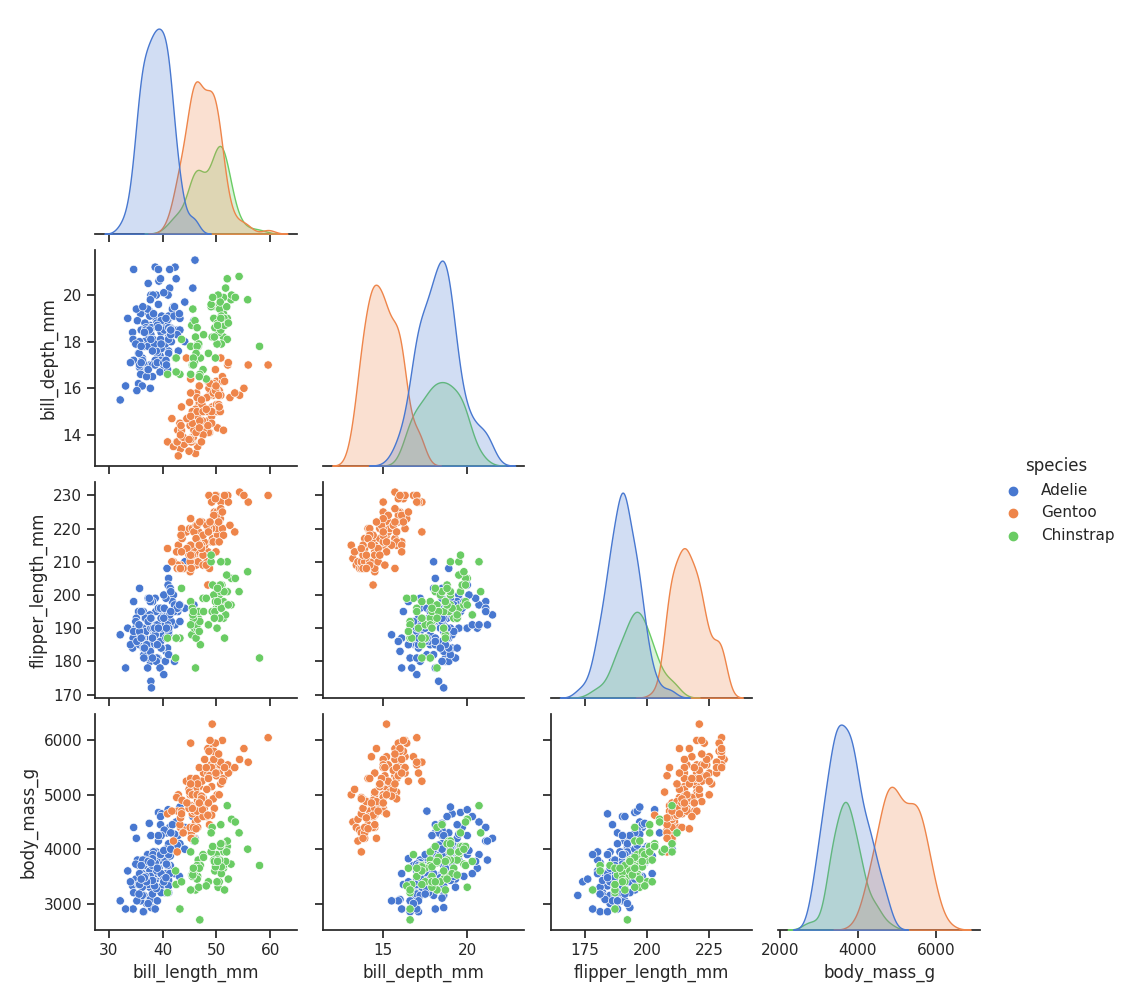

In [6]:
# We first create a scatter plot matrix with seaborn - here, the parameter "hue" is used to
# select "groups" in the data. You can explore how the data looks if
# you select "island" or "sex" as the hue:
grid = sns.pairplot(
    data,
    corner=True,
    hue="species",
)

#### Example plot 2 - plotting grouped data
Here, we will plot the grouped data for each variable. If we use the
[groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) method
for data frames in pandas:

In [7]:
from matplotlib.gridspec import GridSpec  # For more control of the axes in a figure.


# Slightly modified from the exercise to show everything in one figure:
def plot_variable_group(xvars, datag):
    """Plot distribution for the selected variable vari for grouped data datag."""
    fig = plt.figure(constrained_layout=True, figsize=(9, 5))  # Create empty figure
    grid = GridSpec(ncols=5, nrows=2, figure=fig)  # Create a grid for the axes.
    # This grid is created here so we can manually relocate the legend to the rigt:
    # 1. create axes for putting the legend into:
    ax_right = fig.add_subplot(grid[:, -1])
    ax_right.axis("off")  # Turn off the lines
    # 2. Create the axis for plotting:
    ax0 = fig.add_subplot(grid[0, 0:2])
    ax1 = fig.add_subplot(grid[0, 2:4])
    ax2 = fig.add_subplot(grid[1, 0:2])
    ax3 = fig.add_subplot(grid[1, 2:4])
    axes = [ax0, ax1, ax2, ax3]
    # 3. Plot the grouped data for the selected variable:
    for vari, ax in zip(xvars, axes):
        datag[vari].plot(kind="kde", ax=ax, legend=True, lw=3)
        ax.set_xlabel(vari)
        if vari == "bill_length_mm":  # 4. Steal and move the legend:
            handles, labels = ax.get_legend_handles_labels()  # Copy the legend
            ax_right.legend(handles, labels, ncol=1)  # Move the legend
        ax.get_legend().remove()  # Remove legend from original axis
    sns.despine(fig=fig)  # Update seaborn style to remove spines

The method above can be used as follows:

<IPython.core.display.Javascript object>


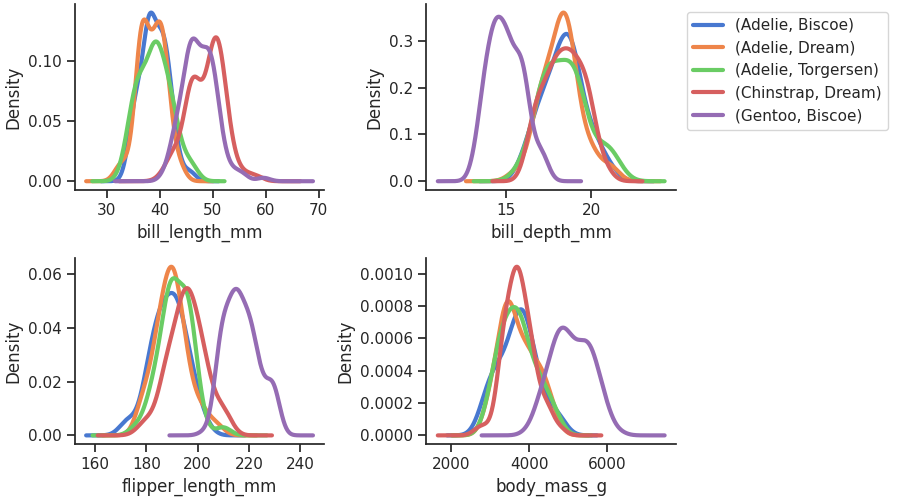

In [8]:
datag = data.groupby(["species", "island",])
xvars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
plot_variable_group(xvars, datag)

#### Example 3 - plotting data for a specific island
Here is another example where we group data, but first, we select a specific island:

In [9]:
# Next we will also create a method that will plot penguin data
# for a specific island.


def plot_island_data(data, island):
    """Plot distributions for all variables for a selected island."""
    xvars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

    datai = data[data["island"] == island]  # Select island
    datag = datai.groupby(["species", "sex"])  # Group the data for plotting

    # Set up empty figure:
    fig = plt.figure(constrained_layout=True, figsize=(9, 3))
    fig.suptitle(f"Island: {island}")
    grid = GridSpec(ncols=len(xvars), nrows=2, figure=fig)
    # Create 4 axes (on for each variable):
    axes = [fig.add_subplot(grid[0, i]) for i in range(len(xvars))]
    # Create one axis (below the 4 axes just created) to hold a legend
    axes_bottom = fig.add_subplot(grid[1, :])
    axes_bottom.axis("off")  # Turn off lines etc. for the bottom axis.

    # Plot the 4 variables
    for i, (vari, ax) in enumerate(zip(xvars, axes)):
        datag[vari].plot(
            kind="kde",
            ax=ax,
            legend=(i == 0),  # Just put a legend for the first one
            lw=3,
        )
        ax.set_xlabel(vari)
        if i == 0:  # Steal the legend from the axis and move it to the bottom
            handles, labels = ax.get_legend_handles_labels()
            axes_bottom.legend(handles, labels, ncol=4)
            ax.get_legend().remove()
        else:
            # The y-label is the same for all plots, so only keep it for the first plot:
            ax.set_ylabel("")  # Remove y-label
    sns.despine(fig=fig)

This method can be used as follows:

<IPython.core.display.Javascript object>


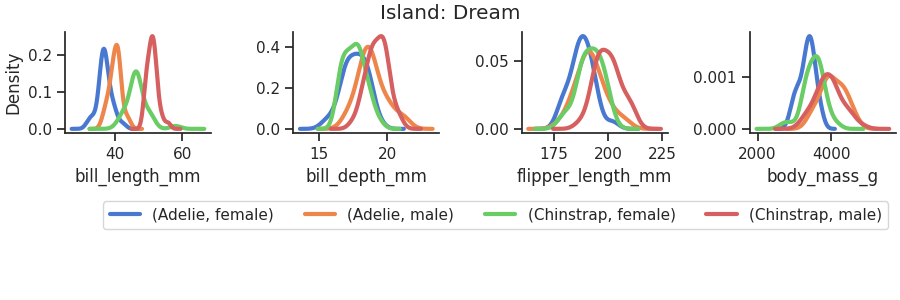

<IPython.core.display.Javascript object>


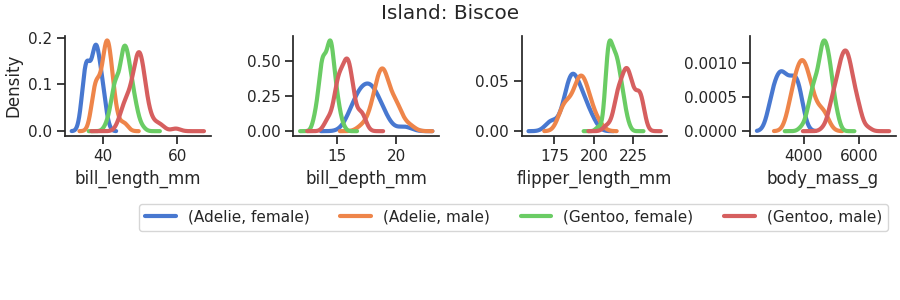

<IPython.core.display.Javascript object>


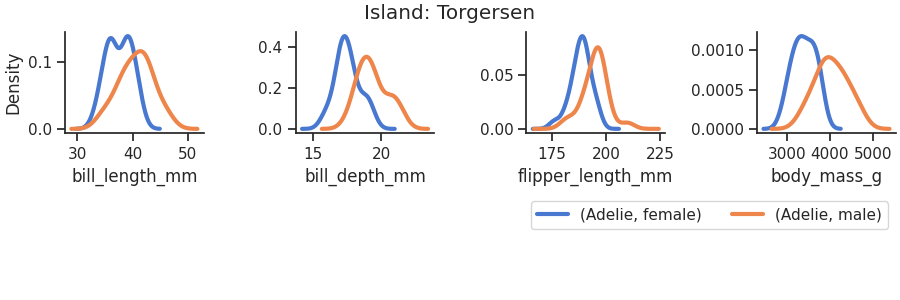

In [10]:
plot_island_data(data, "Dream")
plot_island_data(data, "Biscoe")
plot_island_data(data, "Torgersen")

#### Your answer to question 11.1(b):

Using the plots above, here are some simple rules:

1. If the flipper length is larger than 205 mm, it is most likely a Gentoo.
2. If the flipper length is smaller than 205 mm and the bill length is smaller than 43 mm, it is most likely a Adelie.
3. If the flipper length is smaller than 205 mm and the bill length is larger than 43 mm, it is most likely a Chinstrap.

## 11.2 Creating a decision tree for determining the species

### 11.2(a) Coding the species

We have three species, and the data we have is categorical. To use the specie in
numerical methods, we will need to represent it with numbers. For decision trees,
we can simply use the numbers 0, 1, and 2 to represent the three species (we are not
doing any math with these numbers and they only have a meaning as labels for the decision tree).

Generating numbers for categorical data is a common task and sklearn has a built-in method for
that called [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). This one can be used as follows:

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create some categorical data:
raw_data = ["bears", "beets", "battlestar galactica", "bears", "bears", "beets"]
# Create the encoder and fit it to the data:
encoder = LabelEncoder().fit(raw_data)
# Show the classes the encoder found:
print("Classes are:", encoder.classes_)

Classes are: ['battlestar galactica' 'bears' 'beets']


In [12]:
# Apply the encoder to transform the raw data to numbers:
y = encoder.transform(raw_data)
print(y)

[1 2 0 1 1 2]


In [13]:
# We can also convert back:
labels = encoder.inverse_transform(y)
print(labels)
# Check that we got the same as we started with:
print([i == j for i, j in zip(raw_data, labels)])

['bears' 'beets' 'battlestar galactica' 'bears' 'bears' 'beets']
[True, True, True, True, True, True]


Create a new encoder for the species and transform the species in the data to numerical y-values.
You will use these y-values in the following to create the decision tree.

In [14]:
species_encoder = LabelEncoder().fit(data["species"])
y = species_encoder.transform(data["species"])
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### Your answer to question 11.2(a):
(See the code above)

### 11.2(b) Creating the decision tree

Create a decision tree for determining the species. Use the numerical y-values you just created
for your y, and use `bill_length_mm`, `bill_depth_mm`,
`flipper_length_mm`, and `body_mass_g` as your X-variables. Keep the tree as simple as possible so
that it is easy to interpret it.

After you have created the decision tree, show the **confusion matrix** and calculate
the **precision** and **recall**.

**Note!** We have here 3 species. This means that we have to define how we should calculate these metrics.
Let us take the recall as an example. For binary classification where we only have two classes it is:

\begin{equation}
\text{recall} = \frac{TP}{TP + FN}
\end{equation}

where $TP$ is the number of true positives and $FN$ is the number of false negatives. If we have 3 classes
we will get $TP$ (or $FN$) for class 0, 1, and 2. We will here consider two possibilities (there are more!) for
the averaging into one recall score:

* macro-averaging: This will calculate the metric (for instance, the recall) for each class
  independently and it will then take the average (all classes are treated equally):
  
  \begin{equation}
  \text{recall}_0 = \frac{TP_0}{TP_0 + FN_0}, \quad \text{recall}_1 = \frac{TP_1}{TP_1 + FN_1},
  \quad \text{recall}_2 = \frac{TP_2}{TP_2 + FN_2}.
  \end{equation}
  
  Here $TP_i$ means correct classifications for class $i$ and $FN_i$ means mistakes for class $i$.
  
  \begin{equation}
  \text{recall}_\text{macro} = \frac{\text{recall}_0 + \text{recall}_1 + \text{recall}_2}{3}
  \end{equation}
  


* micro-averaging: This will aggregate contributions of all classes and use this to
  calculate the average:
  
  \begin{equation}
  \text{recall}_\text{micro} = \frac{TP_0 + TP_1 + TP_2}{TP_0 + TP_1 + TP_2 + FN_0 + FN_1 + FN_2}
  \end{equation}
  

Since the macro-averaging is treating all classes equally, it will not deal well with cases
where we have a class imbalance (for instance, if we have few items of one class compared to the others). In
such cases, micro-averaging is preferred.

Here is a short example:

In [15]:
from sklearn.metrics import recall_score

y_true = [0, 0, 1, 1, 2, 2, 2, 2]
y_pred = [0, 1, 1, 2, 1, 1, 0, 2]
macro = recall_score(y_true, y_pred, average="macro")
micro = recall_score(y_true, y_pred, average="micro")
print(f"recall(macro) = {macro}")
print(f"recall(micro) = {micro}")

recall(macro) = 0.4166666666666667
recall(micro) = 0.375


For completeness, let us do this by hand as well:

| Class | True positives (correct) | False negatives (mistakes) |
|:-:|:-:|:-:|
| 0 | 1 | 1 |
| 1 | 1 | 1 |
| 2 | 1 | 3 |

* macro-averaging:
  
  \begin{equation}
  \text{recall}_0 = \frac{TP_0}{TP_0 + FN_0} = \frac{1}{1+1}=0.5, \quad \text{recall}_1 = \frac{TP_1}{TP_1 + FN_1} =   \frac{1}{1+1}=0.5,
  \quad \text{recall}_2 = \frac{TP_2}{TP_2 + FN_2} = \frac{1}{1+3}=0.25.
  \end{equation}

  \begin{equation}
  \text{recall}_\text{macro} = \frac{0.5 + 0.5 + 0.25}{3} = \frac{5}{12} = 0.41666\ldots
  \end{equation}
 
* micro-averaging: 
 
  \begin{equation}
  \text{recall}_\text{micro} = \frac{TP_0 + TP_1 + TP_2}{TP_0 + TP_1 + TP_2 + FN_0 + FN_1 + FN_2}
  = \frac{1 + 1 + 1}{1 + 1 + 1 + 1+ 1+3} = \frac{3}{8} = 0.375
  \end{equation}
  

Motivated by the fact that we do not have an equal number of samples for the different species, I
suggest using micro-averaging in the following. If you use
[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
for finding the optimum depth of your tree, this can be done by setting `scoring="recall_micro"` in
`GridSearchCV`. Here is a short example you can adapt to make your decision tree:

Best tree: DecisionTreeClassifier(max_depth=4, random_state=42)
precision = 0.9523809523809523
recall = 0.9523809523809523


<IPython.core.display.Javascript object>


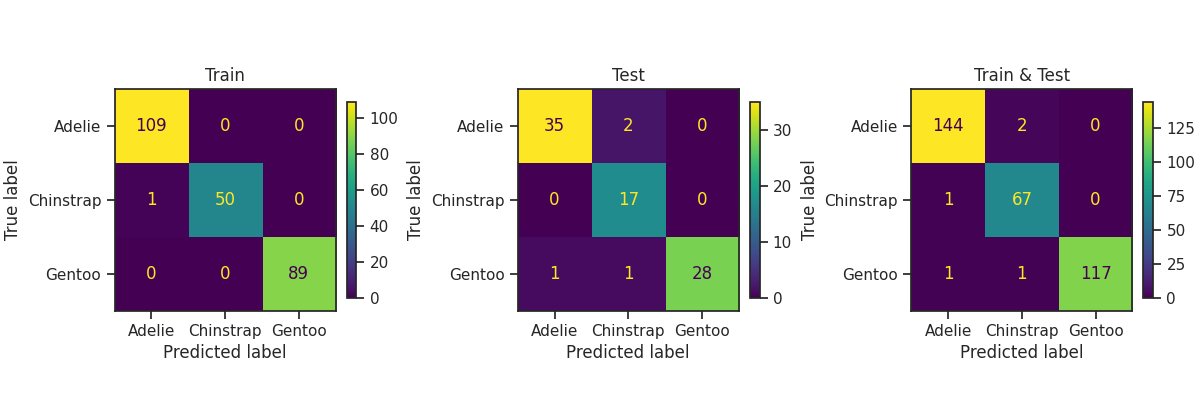

In [16]:
from sklearn.datasets import make_classification
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier

# Use the real data:
xvars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = data[xvars]
# Create test/training sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Set up a grid search:
parameters = {"max_depth": range(1, 10)}
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    parameters,
    scoring="recall_micro",
)

# Run the grid search:
grid.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_tree = grid.best_estimator_
print("Best tree:", best_tree)

# Use the best classifier for the test set:
y_pred = best_tree.predict(X_test)

# Calculate the precision etc. for the test set:
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
print(f"precision = {precision}")
print(f"recall = {recall}")


# Make confusion matrix:
fig, axes = plt.subplots(constrained_layout=True, figsize=(12, 4), ncols=3)
axes[0].set_title("Train")
axes[1].set_title("Test")
axes[2].set_title("Train & Test")
ConfusionMatrixDisplay.from_estimator(
    best_tree,
    X_train,
    y_train,
    display_labels=species_encoder.classes_,
    ax=axes[0],
    colorbar=False,
)
fig.colorbar(axes[0].images[0], ax=axes[0], shrink=0.5)

ConfusionMatrixDisplay.from_estimator(
    best_tree,
    X_test,
    y_test,
    display_labels=species_encoder.classes_,
    ax=axes[1],
    colorbar=False,
)
fig.colorbar(axes[1].images[0], ax=axes[1], shrink=0.5)

ConfusionMatrixDisplay.from_estimator(
    best_tree,
    X,
    y,
    display_labels=species_encoder.classes_,
    ax=axes[2],
    colorbar=False,
)
fig.colorbar(axes[2].images[0], ax=axes[2], shrink=0.5)

#### Your answer to question 11.1(b):
The precision and recall was 0.95 and the depth of the tree was 4.

### 11.2(c) Micro-averaged precision vs. recall
You may have noted that the precision and recall seems to give the same value when we use micro-averaging.
Can you explain this from the definitions of the micro-averaged precision and recall,

\begin{equation}
\text{recall}_\text{micro} = \frac{\sum_{i} TP_i}{\sum_{i} TP_i + \sum_{i} FN_i}
\end{equation}

\begin{equation}
\text{precision}_\text{micro} = \frac{\sum_{i} TP_i}{\sum_{i} TP_i + \sum_{i} FP_i}
\end{equation}

where the sum runs over all classes.

Hint: Give an argument for the two sums $\sum_{i} FN_i$ and $\sum_{i} FP_i$ being equal.

#### Your answer to question 11.2(c):

Well, according to the definition given in the start of problem [11.2(b)](#11.2(b)-Creating-the-decision-tree)
there is no distinction between the mistakes as positive so both the recall and precision are obtained
as the number of true positives divided by the total number of positives predicted.

In different classification strategies (for instance, the so-called one-vs-rest that
splits a multi-class classification
into one binary classification per class) a false negative will be a false positive for another class. In this
case $\sum_{i} FN_i = \sum_{i} FP_i$.

### 11.2(d) Visualize your decision tree

Visualize your decision tree and compare it with your answer to [11.1(b)](#11.1(b)-Exploring-by-plotting). Are the rules found
by the decision tree (this is easier to compare if you did not go all-out on the depth of your decision tree) similar to your rules?

Here is an example of how you can visualize a decision tree:

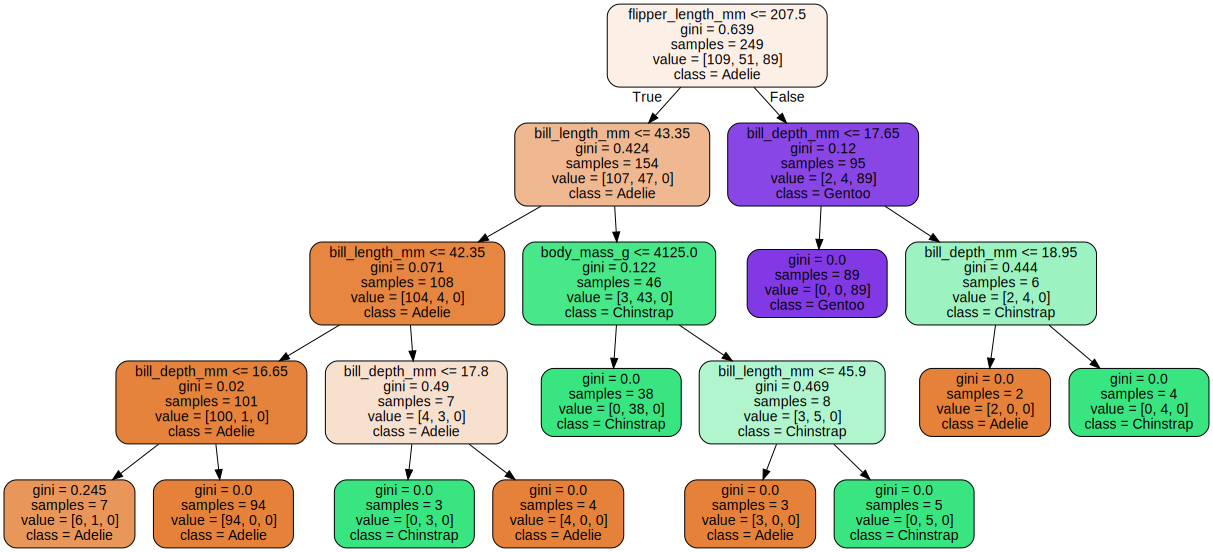

In [17]:
import graphviz
from IPython.display import SVG
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=xvars,
    class_names=species_encoder.classes_,
    rounded=True,
    filled=True,
)
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format="svg"))

<IPython.core.display.Javascript object>


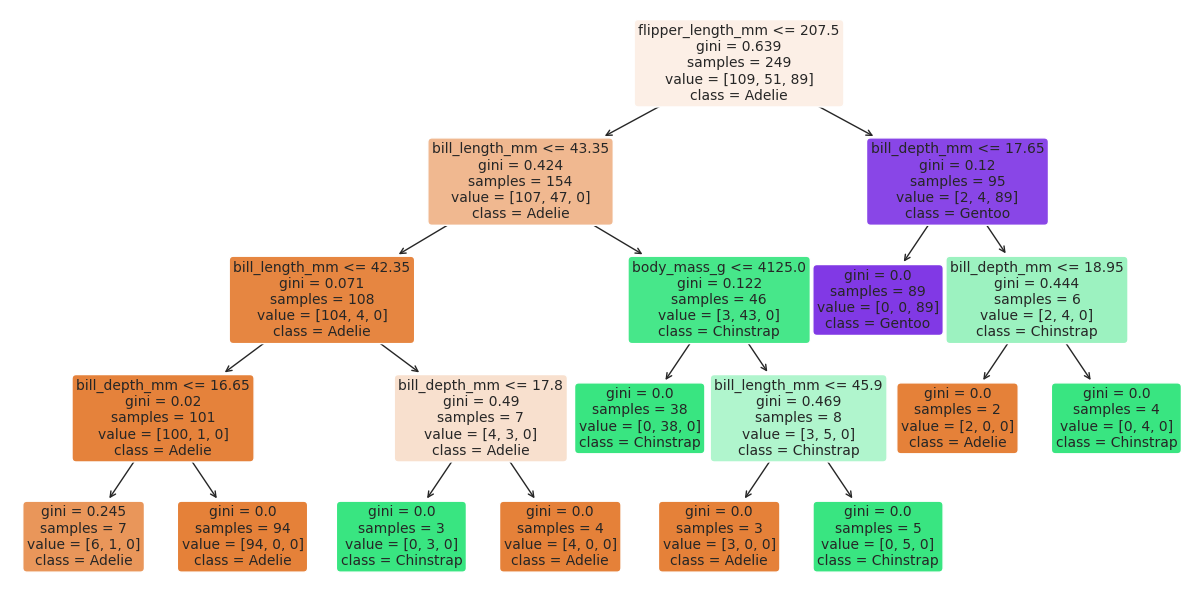

In [18]:
# Alternative plot that might be easier to navigate:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 6))
plot_tree(
    best_tree,
    feature_names=xvars,
    filled=True,
    rounded=True,
    class_names=species_encoder.classes_,
    fontsize=10,
);

#### Your answer to question 11.2(d):
If we make a simplified interpretation of the tree (simplified = only paying attention to where we have
most penguins). We see that:

1. Gentoo penguins a penguins with a flipper length larger than 207.5 mm
2. Adelie penguins are penguins with a flipper length smaller than 207.5 mm and a bill length smaller than 42.35 mm.
3. Chinstrap penguins are penguins with a flipper length smaller than 207.5 mm and a bill length larger than 42.35 mm.

This compare well to the answer to [11.1(b)](#Your-answer-to-question-11.1(b):).

## 11.3 Exploring the penguins with partial least squares discriminant analysis (PLS-DA)

Partial least squares discriminant analysis is essentially PLS for categorical y-variables. Since it is working
with categorical variables, we can use it in the context of classification. For the most part,
[11.3](#11.3-Exploring-the-penguins-with-partial-least-squares-discriminant-analysis-(PLS-DA)) is only asking you to run some code and observe the results.

### 11.3(a) Converting categorical data to numerical values

First, we will convert the categorical data in the original data set to numerical values. We have to be
a bit careful here and keep in mind that these numerical values will be used for calculations by PLS. We will,
therefore, encode them so that the numbers only have meaning in terms of a variable being "on" or "off".

Since this is also a common strategy to deal with categorical data, there is a method in pandas to do just this
and this method is called [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html):

In [19]:
data_dum = pd.get_dummies(data)
data_dum

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
3,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
4,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207.0,4000.0,0,1,0,0,1,0,0,1
329,43.5,18.1,202.0,3400.0,0,1,0,0,1,0,1,0
330,49.6,18.2,193.0,3775.0,0,1,0,0,1,0,0,1
331,50.8,19.0,210.0,4100.0,0,1,0,0,1,0,0,1


As you can see from the table above, we have now effectively created one variable per category for the categorical
variables.

For instance, for "sex" we now have "sex_female" and "sex_male" to distinguish between female and
male penguins. You will also note that these two new variables are perfectly correlated:
If one of them is 1, then the other has to be 0! This means that we have introduced a lot of correlations in our
new data set. If we were doing least squares regression, we would have kept only one of the two variables. This can
be automatically done by `data_dum = pd.get_dummies(data, drop_first=True)`.

PLS is not afraid of correlations, so we will in the following keep all variables!

### 11.3(b) Creating a PLS model and inspecting loadings

We will now create the PLS model. Here, we do not attempt to find the best number of components.

In [20]:
from sklearn.cross_decomposition import PLSRegression

data_dum = pd.get_dummies(data)

xvars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
yvars = [i for i in data_dum.columns if i not in xvars]

X = scale(data_dum[xvars].to_numpy())
Y = data_dum[yvars].to_numpy()
pls = PLSRegression(n_components=4, scale=False)
pls.fit(X, Y)

PLSRegression(n_components=4, scale=False)

In [21]:
def create_loadings_plot(pls_model, xvars, yvars, idx1=0, idx2=1, factor=2.5):
    """Plot the X and Y loadings for a PLS model."""
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 6))

    loadingsx = pls_model.x_rotations_
    loadingsy = pls_model.y_loadings_

    scat = ax.scatter(loadingsx[:, idx1], loadingsx[:, idx2])
    for i, xi in enumerate(xvars):
        ax.text(loadingsx[i, idx1], loadingsx[i, idx2], xi)

    for i, yvar in enumerate(yvars):
        ax.plot(
            [0, factor * loadingsy[i, idx1]],
            [0, factor * loadingsy[i, idx2]],
            color="red",
        )
        text = yvar.split("_")[1]
        ax.text(
            factor * loadingsy[i, idx1],
            factor * loadingsy[i, idx2],
            text,
            color="red",
            va="bottom" if loadingsy[i, idx2] > 0 else "top",
            ha="center",
        )
    ax.axhline(y=0, color="k", ls=":")
    ax.axvline(x=0, color="k", ls=":")
    ax.set_aspect("equal")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set(xlabel=f"PLS component {idx1+1}", ylabel=f"PLS component {idx2+1}")
    ax.set_title("Loadings", loc="left")
    sns.despine(fig=fig)

<IPython.core.display.Javascript object>


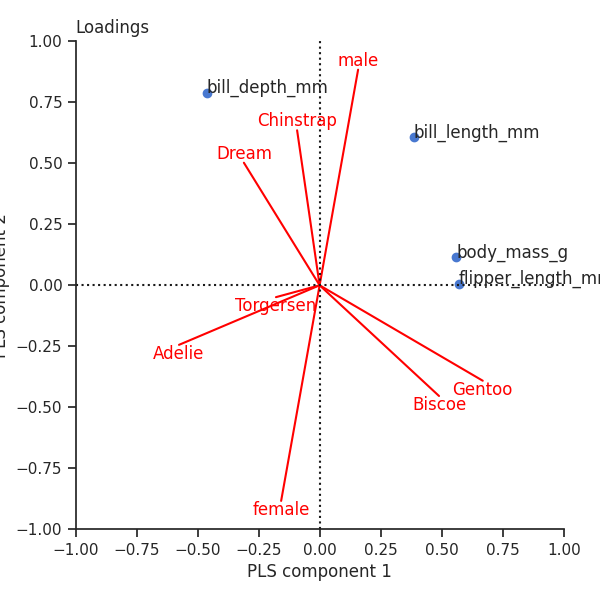

In [22]:
create_loadings_plot(pls, xvars, yvars)

Run the code above and consider the following:

1. On the island of Biscoe, what specie do you expect to find the most of? Is there
   a specie you do not expect to find on Biscoe?


2. What features distinguish most between female and male penguins?


3. Do you agree with the following statement (why/why not): "Gentoo penguins are heavier than the
   other penguin species".
   

4. Do you agree with the following statement (why/why not): "Gentoo penguins have a larger flipper length and
   smaller bill depth than the other penguins".
   

5. Do you agree with the following statement (why/why not): "The bill length distinguish Adelie
   penguins from the other species.

#### Your answer to question 11.3(b):


> 1. On the island of Biscoe, what specie do you expect to find the most of? Is there
>    a specie you do not expect to find on Biscoe?

The loading for the island of Biscoe is positively correlated with the loading for Gentoo. It is positively
correlated (along PLS component 2) with Adelie and negatively correlated with Chinstrap. Since the
correlation is strongest for Gentoo, we expect to find most of these on Biscoe. Also since it is negatively
correlated with Chinstrap, we do not expect to find these penguins on Biscoe. This can also be seen from
the raw data in [11.1(a)](#Your-answer-to-question-11.1(a):): there were 44 Adelie samples and 119 Gentoo samples from Biscoe.


> 2. What features distinguish most between female and male penguins?

Overall, the male loading is positively (and the female is negatively) correlated with bill length and bill depth. There is also a weak positive
correlation with the body mass and flipper length. The two most important features seems to be bill length and
bill depth - male penguins seem to have larger beaks.


> 3. Do you agree with the following statement (why/why not): "Gentoo penguins are heavier than the
>    other penguin species".

Yes, the loading for the body mass is positively correlated with the loading for Gentoo. It is negatively
correlated with the two other penguin species.

> 4. Do you agree with the following statement (why/why not): "Gentoo penguins have a larger flipper length and
>    smaller bill depth than the other penguins".
   
Yes, the loading for Gentoo is positively correlated with the flipper length (along PLS component 1) and
negatively correlated with the bill depth.

> 5. Do you agree with the following statement (why/why not): "The bill length distinguish Adelie
>    penguins from the other species.

Yes, the loading for bill length is negatively correlated with the loading for Adelie. A smaller bill length
was also used by the decision tree to classify penguins as Adelie.

## 11.3(c) Predicting the sex of penguins

In the [original article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081),
the authors created several models to predict the sex of different penguin species. Here is an image with their
results:


| <img src="./Figures/penguintable.png" width="100%">                                   |
|:-:|
| **Fig. 3** *Regression models for predicting the sex of penguins.*    |

**Note:** In Fig. 3 above, the word `Culmen` is used in place of `bill` (i.e., `culmen length` = `bill length`).

We will now repeat this with 
PLS, and we use only the `sex_female` and `sex_male` variables as our Y:

In [23]:
# Create models, one per penguin specie:
models = {}
yvars_ = ["sex_female", "sex_male"]
xvars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

for specie in data["species"].unique():
    data_species = data[data["species"] == specie]
    data_dum = pd.get_dummies(data_species)

    X = scale(data_dum[xvars].to_numpy())
    Y = data_dum[yvars_].to_numpy()
    pls_model = PLSRegression(n_components=4, scale=False)
    pls_model.fit(X, Y)
    models[specie] = pls_model

### 11.3(c)-1 Regression coefficients and loadings for Adelie penguins

In [24]:
import numpy as np


# First, we create a method for showing regression coefficients:
def show_regression_coeffs(pls_model, xvars, yvars):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    fig.suptitle("Regression coefficients")
    pos = np.arange(len(xvars))

    ax.axhline(y=0, ls=":", color="k")
    width2 = 0.8
    width = width2 / 2

    B_PLS = pls_model.coef_

    r1 = ax.bar(pos - 0.25, B_PLS[:, 0], width=width, label="Female")
    r2 = ax.bar(pos + 0.25, B_PLS[:, 1], width=width, label="Male")

    for i in pos:
        ax.axvline(x=i + 0.5, ls=":", color="k")

    ax.set_xticks(pos)
    ax.set_xticklabels(xvars, rotation=90)
    ax.legend()
    sns.despine(fig=fig)

<IPython.core.display.Javascript object>


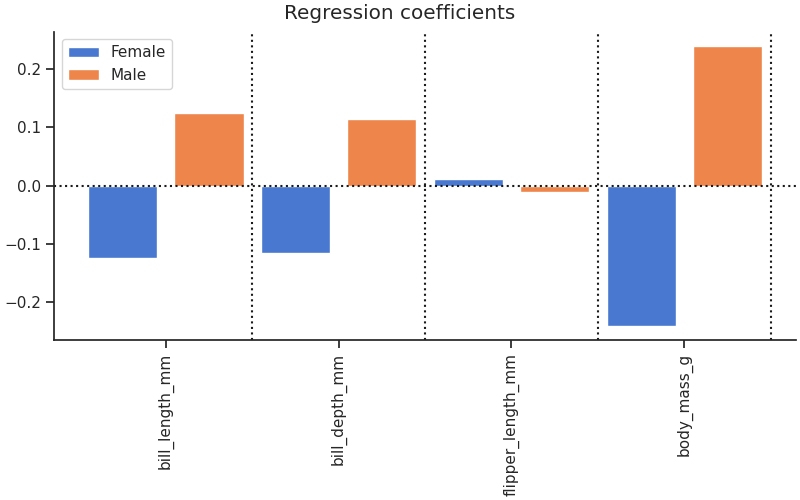

<IPython.core.display.Javascript object>


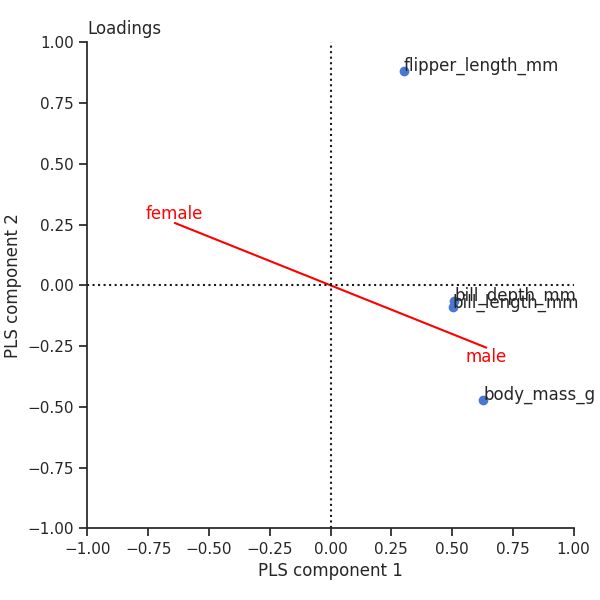

In [25]:
show_regression_coeffs(models["Adelie"], xvars, yvars_)
create_loadings_plot(models["Adelie"], xvars, yvars_)

If you have a look at the [image given above](#11.3(c)-Predicting-the-sex-of-penguins) from the original article, you see that the performance of the three models for the Adelie penguins are equal (the same percentage of correct classifications are made). Can you explain this using the plots above (i.e., why do the models not change when the authors introduce more variables)?

#### Your answer to question 11.3(c)-1:
In the loadings plot we see that the bill depth and bill length are located on top of each other, and
that they are correlated positively (or negatively) with male (or female). Since these variables
are so close, it means that
they are almost perfectly correlated and they describe the same thing in this model. We would then only need one
of them when making a predictive model.

The flipper length is located far away from both the male and female loadings. Further, we see that the regression
coefficients for this variable are small and do not contribute much.

We also see that the body mass is correlated with the male/female distinction, and the size of the regression
coefficients suggest that the body mass is important for the distinction.

Based on this, we would expect that we can make a good model when including the body mass,
excluding the flipper length, and including the bill length or the bill depth. We also expect that the model
would not improve when adding the flipper length (as it seems to not contribute much) and if we use both the
bill length and bill depth, we will not improve the model since these two variables describe the same thing here.

### 11.3(c)-2 Regression coefficients and loadings for Chinstrap penguins

<IPython.core.display.Javascript object>


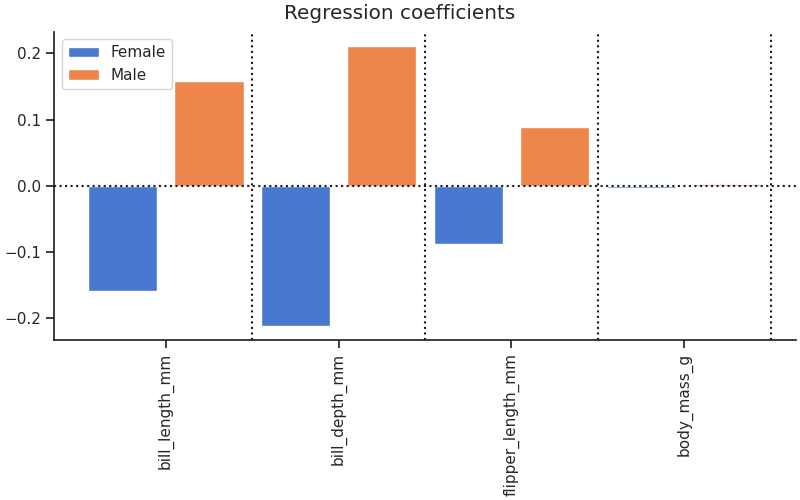

<IPython.core.display.Javascript object>


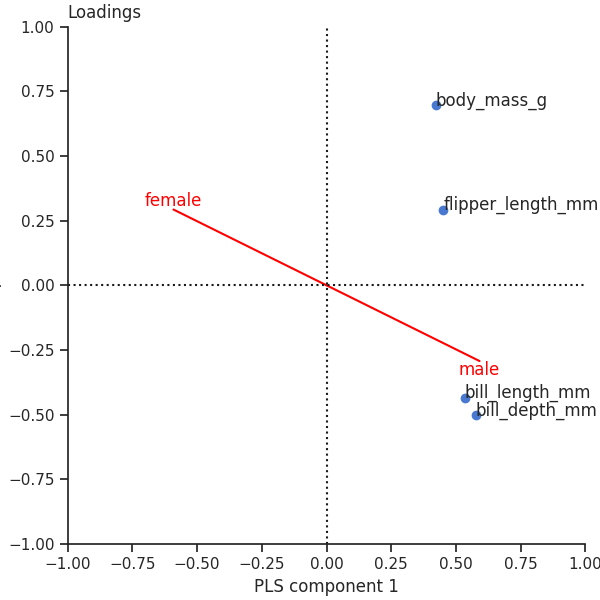

In [26]:
show_regression_coeffs(models["Chinstrap"], xvars, yvars_)
create_loadings_plot(models["Chinstrap"], xvars, yvars_)

For the model for Chinstrap penguins, the authors used only the bill length and bill depth (see the [image given above](#11.3(c)-Predicting-the-sex-of-penguins)). Do you think the model would improve if you also include the body mass?

#### Your answer to question 11.3(c)-2:
No, the regression coefficients for the body mass are small (it does not contribute a lot) and the loading for
the body mass is not very strongly correlated with the male/female distinction. There is a weak correlation with
the sex, but the other variables seem to be more strongly correlated. Let us check this from the raw data:

<IPython.core.display.Javascript object>


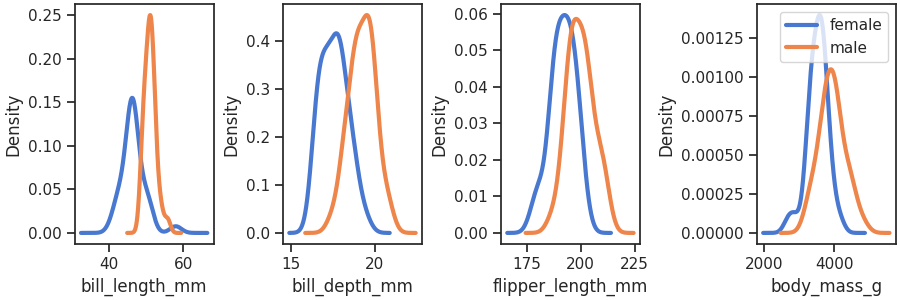

In [27]:
datag = data[data["species"] == "Chinstrap"].groupby("sex")
fig, axes = plt.subplots(constrained_layout=True, ncols=4, figsize=(9, 3))
for x, ax in zip(xvars, axes):
    datag[x].plot(kind="kde", legend=(x == "body_mass_g"), ax=ax, lw=3)
    ax.set_xlabel(x)

From the figure above, we see that the flipper length and body mass are not too different for the female/male 
distinction, and that the bill length and depth separated better.

### 11.3(c)-3 Regression coefficients and loadings for Gentoo penguins

<IPython.core.display.Javascript object>


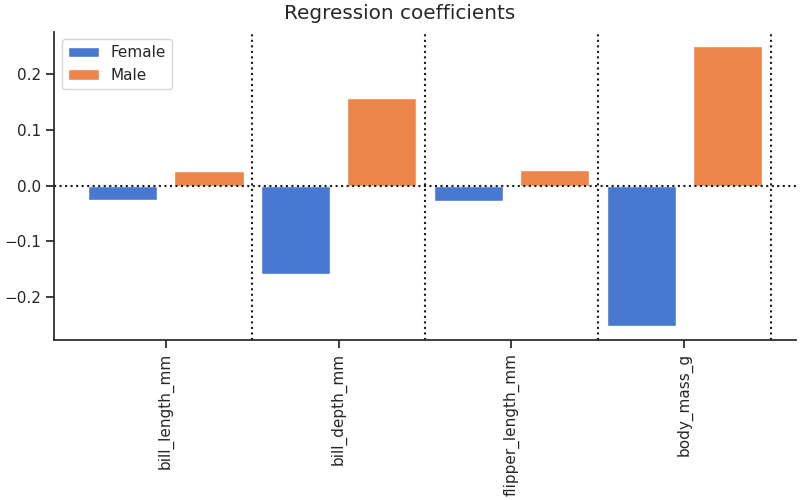

<IPython.core.display.Javascript object>


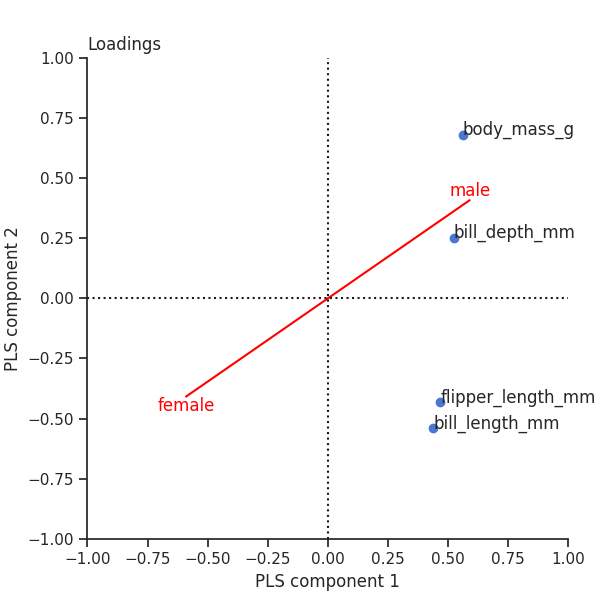

In [28]:
show_regression_coeffs(models["Gentoo"], xvars, yvars_)
create_loadings_plot(models["Gentoo"], xvars, yvars_)

For their model for Gentoo penguins, the authors (see the [image given above](#11.3(c)-Predicting-the-sex-of-penguins)) included the bill length (and excluded the flipper length). Do you think the bill length is
needed in the model of Gentoo penguins?

#### Your answer to question 11.3(c)-3:
We see here that the flipper length and bill length are located close to each other in the loading plot and
we expect that these two variables would be of equal importance to the model. This can also be seen from the
regression coefficients that are of similar size for these two variables.

Thus, if we exclude the flipper length, we should also probably exclude the bill length as it does not seem to
be any more important than the flipper length.

## 11.4 Building a logistic regression model for Gentoo penguins

As a follow-up of [11.3(c)-3](#11.3(c)-3-Regression-coefficients-and-loadings-for-Gentoo-penguins),
let us build the
same type of
[models as the original authors](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081#s2),
and compare the effect of including the bill length or not. In the original article,
the authors used [Logistic regression]() which essentially is least squares + "something" 
that squashes the straight least squares line into binary results (0 or 1, so that we can use the results
for classification). Usually, that "something" is a sigmoid function
(an "S" shaped function).


Since the authors report the "% correctly classified"
(see the [image given above](#11.3(c)-Predicting-the-sex-of-penguins))
we will here use the accuracy (for a test set) as our metric.

In [29]:
from sklearn.linear_model import LogisticRegression

xvars1 = ["bill_length_mm", "bill_depth_mm", "body_mass_g"]
xvars2 = ["bill_depth_mm", "body_mass_g"]

data_gentoo = data[data["species"] == "Gentoo"]

X1 = scale(data_gentoo[xvars1])
X2 = scale(data_gentoo[xvars2])

y = LabelEncoder().fit_transform(data_gentoo["sex"])

In [30]:
from sklearn.metrics import accuracy_score


def make_model(X_data, y):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y, stratify=y)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

In [31]:
# Just repeat making the model 10 times:
scores1 = [make_model(X1, y) for _ in range(10)]
print(f"Model 1 (X = {xvars1})")
print(f"\tAccuracy: {np.mean(scores1):.3g} ± {np.std(scores1):.2g}")

Model 1 (X = ['bill_length_mm', 'bill_depth_mm', 'body_mass_g'])
	Accuracy: 0.95 ± 0.027


In [32]:
scores2 = [make_model(X2, y) for _ in range(10)]
print(f"Model 2 (X = {xvars2})")
print(f"\tAccuracy: {np.mean(scores2):.3g} ± {np.std(scores2):.2g}")

Model 2 (X = ['bill_depth_mm', 'body_mass_g'])
	Accuracy: 0.903 ± 0.031


Based on the results above, would you say that there is a big effect of including the bill length in the
model for Gentoo penguins?
Is this in agreement with your answer to [11.3(c)-3](#Your-answer-to-question-11.3(c)-3:)?

#### Your answer to question 11.4:

The accuracy of these two models seem to approximately be the same, especially if we consider the
standard deviation in the accuracy. This supports our answer to [11.3(c)-3](#Your-answer-to-question-11.3(c)-3:) 
where we said that we probably did not need the bill length.